### Cargar el modelo entrenado de Tensorflow

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


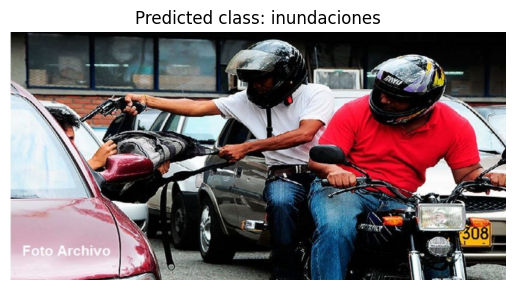

Image: asalto 1.jpg, Predicted class: inundaciones
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


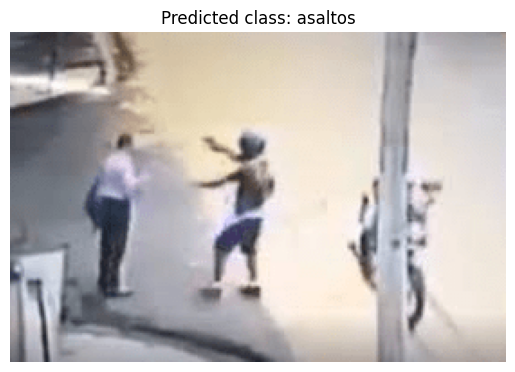

Image: asalto 2.png, Predicted class: asaltos
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


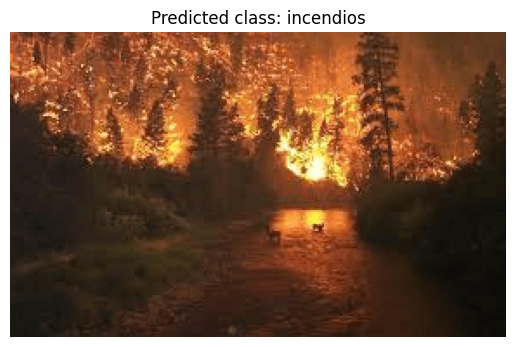

Image: incendio 1.png, Predicted class: incendios
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


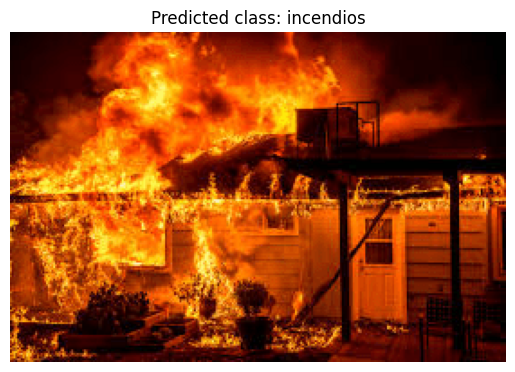

Image: incendio 2.png, Predicted class: incendios
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


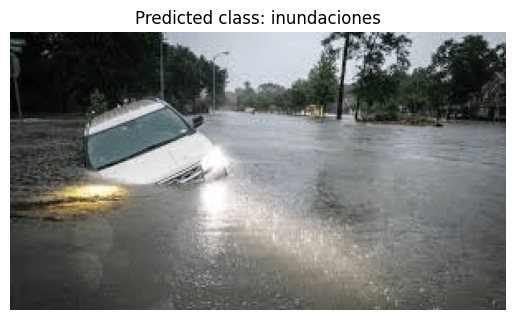

Image: inundacion 1.png, Predicted class: inundaciones
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


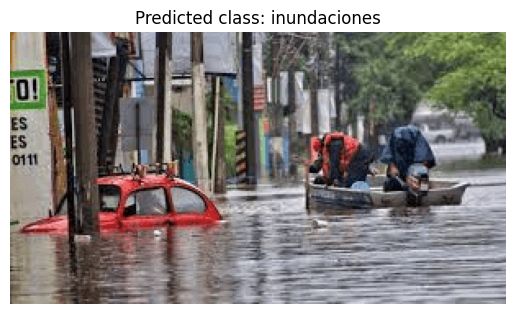

Image: inundacion 2.png, Predicted class: inundaciones
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


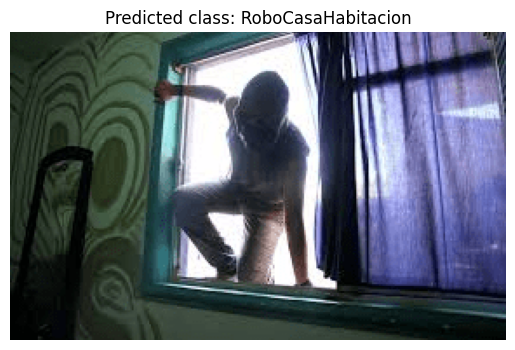

Image: robo casa habitacion 1.png, Predicted class: RoboCasaHabitacion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


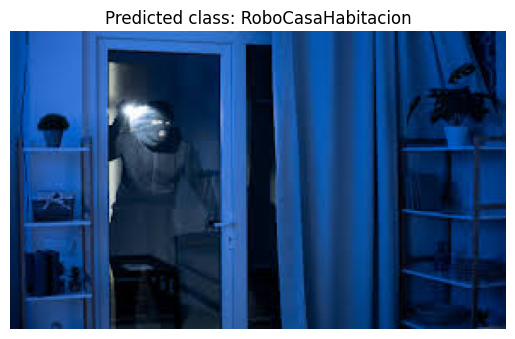

Image: robo casa habitacion 2.jfif, Predicted class: RoboCasaHabitacion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


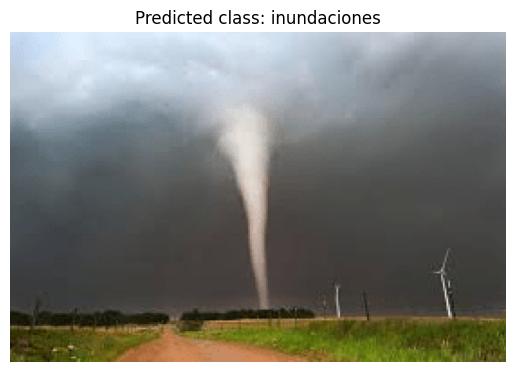

Image: tornado 1.png, Predicted class: inundaciones
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


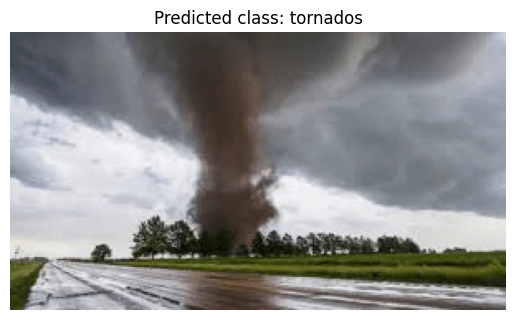

Image: tornado 2.png, Predicted class: tornados


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

# Cargar el modelo
model_path = './desastre_keras.h5'
model = tf.keras.models.load_model(model_path)

# Configuración de parámetros
target_size = (30, 30)
folder_path = "./Pruebas_desastres/"
class_labels = ["asaltos", "incendios", "inundaciones",  "RoboCasaHabitacion", "tornados"]  # Actualiza con tus etiquetas

# Obtén la lista de archivos en la carpeta
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for image_file in image_files:
    # Construye la ruta completa de la imagen
    image_path = os.path.join(folder_path, image_file)

    # Carga la imagen en su tamaño original para mostrarla
    img_original = image.load_img(image_path)
    img_array_original = image.img_to_array(img_original)

    # Redimensiona la imagen para la predicción
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Realiza la predicción
    predictions = model.predict(img_array)

    # Obtiene la etiqueta predicha
    predicted_class_indices = np.argmax(predictions, axis=1)
    predicted_label = class_labels[predicted_class_indices[0]]

    # Muestra la imagen original y la predicción
    plt.imshow(np.uint8(img_array_original))
    plt.title(f"Predicted class: {predicted_label}")
    plt.axis('off')  # Para eliminar los ejes
    plt.show()

    print(f"Image: {image_file}, Predicted class: {predicted_label}")